<a href="https://colab.research.google.com/github/jjaw89/spring_2025_dl_audio_project/blob/main/OpeningAudioFiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# when you install musdb, pip automatically installs a version of stempeg that
# contains a small bug. To work around this, download the stempeg folder from
# the github to your drive.

%pip install musdb  # has some helpful data structures, also installs ffmpeg and stempeg
%pip uninstall stempeg    # musdb installs the wrong version of stempeg'
%pip install librosa      # a package for processing audioYYY

# The path below should be changed to the location of the stempeg package in
# your Drive
%cd '/content/drive/MyDrive/DeepLearningBootcamp'

import stempeg
import musdb
import librosa

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Using cached stempeg-0.2.3-py3-none-any.whl.metadata (9.0 kB)
Using cached stempeg-0.2.3-py3-none-any.whl (963 kB)
Found existing installation: stempeg 0.2.3
Uninstalling stempeg-0.2.3:
  Would remove:
    /usr/local/bin/stem2files
    /usr/local/lib/python3.11/dist-packages/stempeg-0.2.3.dist-info/*
    /usr/local/lib/python3.11/dist-packages/stempeg/*
Proceed (Y/n)? Y
  Successfully uninstalled stempeg-0.2.3
/content/drive/MyDrive/DeepLearningBootcamp


Now the we have the relevant packages downloaded, we will load in the MUSDB18 data from Google Drive. The musdb package provides a convenient data structure called DB to hold and work with the stems. The cell below should take a bit to run since we are loading in so much audio.

In [3]:
# change the string below to the location of the musdb data in your drive
musdb_path = "/content/drive/MyDrive/DeepLearningBootcamp/musdb18_data"
music = musdb.DB(musdb_path, subsets="train")

# If everything has been loaded correctly, there should be 100 tracks
print(len(music))

100


Next, we take a random song from the music DB and print its wave form. For each song, the music DB contains a numpy tensor of shape (5, length of song, number of channels). [Number of channels is 1 for mono audio and 2 for stereo.] The first indicates which instrument is in that audio file, and all files follow the convention:

0 - whole song

1 - bass

2 - drums

3 - other instruments

4 - vocals

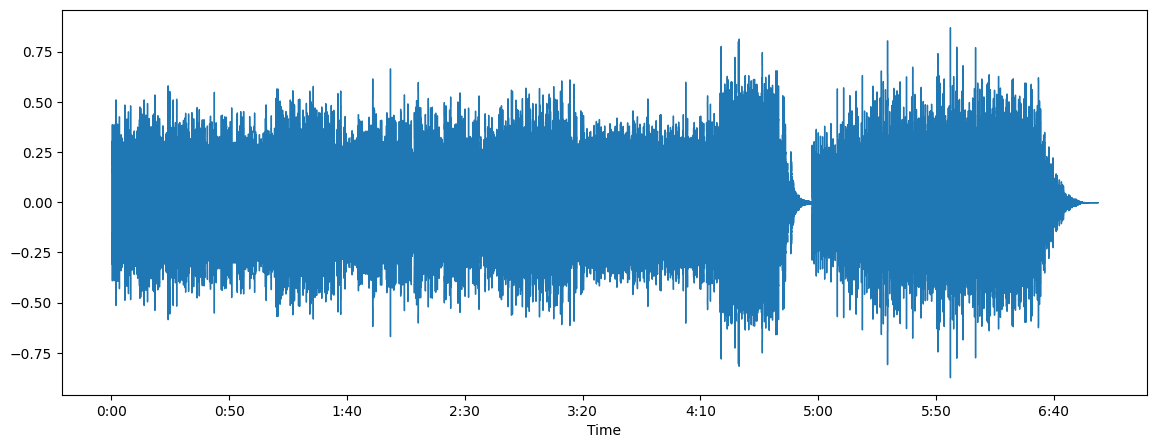

In [4]:
# choose an arbitrary track from the dataset, and record its sample rate
stems = music[8].stems
rate = music[8].rate

whole_song = stems[0]
bass = stems[1]
drums = stems[2]
other_instruments = stems[3]
vocals = stems[4]

import matplotlib.pyplot as plt
import librosa.display

# this prints the waveform (time domain) of the song
plt.figure(figsize=(14, 5))
librosa.display.waveshow(whole_song[:,1], sr = rate)

Next, we print some spectrograms. A spectrogram is a 2-dimensional display of the frequency information over time. The spectrogram is the attribute of a song that seems to be analyzed most often in ml audio applications.

To find the spectrogram, we cut the waveform into small time chunks and compute the fourier transform of each chunk (then take the absolute value of the resulting complex numbers). This gives a time series of the frequency information. This process is called the Short Time Fourier Transform (STFT). The librosa package implements this method.

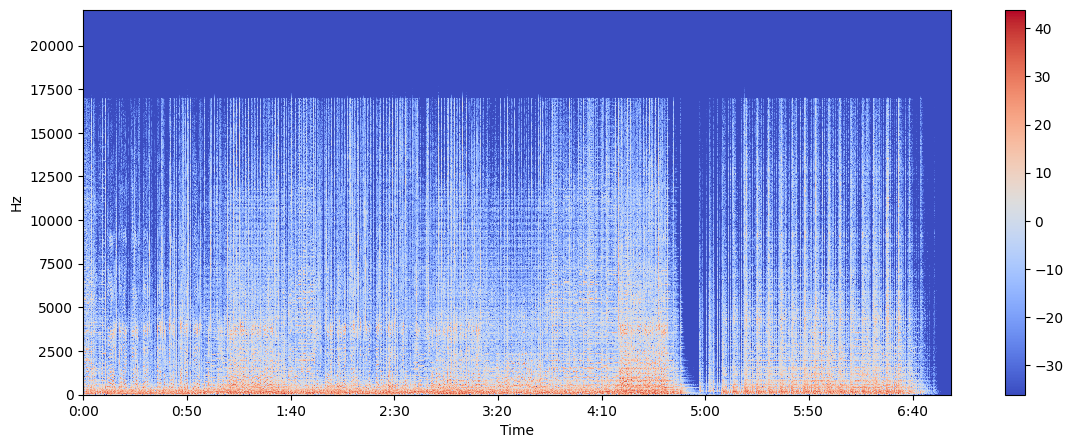

In [5]:
whole_song_stft = librosa.stft(whole_song[:,1])
whole_song_spectrogram = librosa.amplitude_to_db(abs(whole_song_stft))
plt.figure(figsize=(14, 5))
librosa.display.specshow(whole_song_spectrogram, sr=rate, x_axis='time', y_axis='hz')
plt.colorbar()

Let's print the spectrogram for the bass track as well.

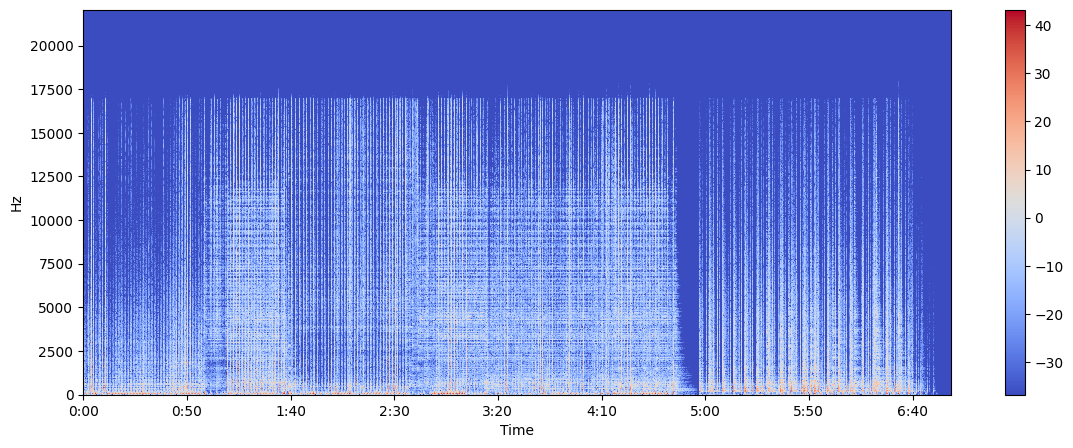

In [6]:
bass_stft = librosa.stft(bass[:,1])
bass_spectrogram = librosa.amplitude_to_db(abs(bass_stft))
plt.figure(figsize=(14, 5))
librosa.display.specshow(bass_spectrogram, sr=rate, x_axis='time', y_axis='hz')
plt.colorbar()

Below, we will load in some of the LibriSpeech data using librosa and convert that audio to spectrogram as well. I downloaded the "clean development set" from the LibriSpeech website (https://www.openslr.org/12), and saved it in my Google Drive. Files in this dataset are saved as flac files which librosa can handle directly.

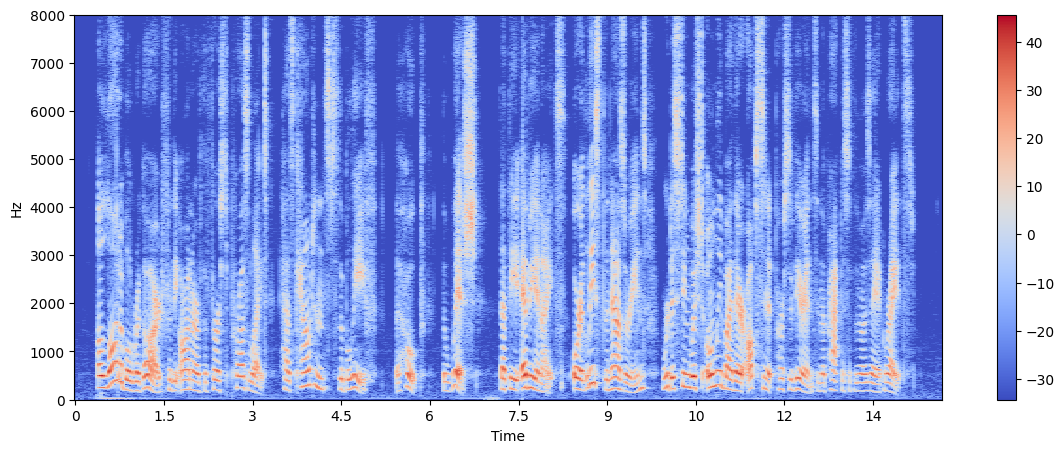

In [9]:
# the sr = None argument tells load not to assume any sample rate and use the same rate from the track
speech, rate = librosa.load('/content/drive/MyDrive/DeepLearningBootcamp/LibriSpeech/dev-clean/1673/143396/1673-143396-0000.flac', sr = None)

speech_stft = librosa.stft(speech)
speech_spectrogram = librosa.amplitude_to_db(abs(speech_stft))
plt.figure(figsize=(14, 5))
librosa.display.specshow(speech_spectrogram, sr = rate, x_axis='time', y_axis='hz')
plt.colorbar()